In [1]:
import tensorflow as tf

## I. INTRO

### A. GRAPH

In [5]:
a = tf.constant([2])
b = tf.constant([3])
c = tf.add(a,b)
session = tf.Session()
result = session.run(c)
print result
session.close()

[5]


In [6]:
with tf.Session() as session:
    result = session.run(c)
    print result

[5]


In [8]:
Scalar = tf.constant([2])
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant([ [[1,2,3],[2,3,4],[3,4,5]], [[4,5,6],[5,6,7],[6,7,8]], [[7,8,9],[8,9,10],[9,10,11]] ])
with tf.Session() as session:
    result = session.run(Scalar)
    print "Scalar (1 entry):\n %s \n" % result
    result = session.run(Vector)
    print "Vector (3 entries):\n %s \n" % result
    result = session.run(Matrix)
    print "Matrix (3x3 entries):\n %s \n" % result
    result = session.run(Tensor)
    print "Tensor (3x3x3 entries):\n %s \n" % result

Scalar (1 entry):
 [2] 

Vector (3 entries):
 [5 6 2] 

Matrix (3x3 entries):
 [[1 2 3]
 [2 3 4]
 [3 4 5]] 

Tensor (3x3x3 entries):
 [[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]] 



In [9]:
Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

first_operation = tf.add(Matrix_one, Matrix_two)
second_operation = Matrix_one + Matrix_two

with tf.Session() as session:
    result = session.run(first_operation)
    print "Defined using tensorflow function: "
    print result
    result = session.run(second_operation)
    print "Defined using normal expressions: "
    print result

Defined using tensorflow function: 
[[3 4 5]
 [4 5 6]
 [5 6 7]]
Defined using normal expressions: 
[[3 4 5]
 [4 5 6]
 [5 6 7]]


In [10]:
Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

first_operation = tf.matmul(Matrix_one, Matrix_two)

with tf.Session() as session:
    result = session.run(first_operation)
    print "Defined using tensorflow function: "
    print result

Defined using tensorflow function: 
[[13 18]
 [18 25]]


### B. VARIABLES

In [17]:
# COUNTER

state = tf.Variable(0)

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init_op = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init_op)
    print session.run(state)
    for _ in range(3):
        session.run(update)
        print session.run(state) 

0
1
2
3


### C. PLACEHOLDERS

In [18]:
a = tf.placeholder(tf.float32)
b = a * 2
with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:3.5})
    print result

7.0


In [19]:
dictionary = {a: [ [[1,2,3],[2,3,4],[3,4,5]], [[4,5,6],[5,6,7],[6,7,8]], [[7,8,9],[8,9,10],[9,10,11]] ]}
with tf.Session() as sess:
    result = sess.run(b, feed_dict=dictionary)
    print result

[[[  2.   4.   6.]
  [  4.   6.   8.]
  [  6.   8.  10.]]

 [[  8.  10.  12.]
  [ 10.  12.  14.]
  [ 12.  14.  16.]]

 [[ 14.  16.  18.]
  [ 16.  18.  20.]
  [ 18.  20.  22.]]]


## II. LINEAR MODELS

In [39]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

### A. LINEAR REGRESSION

$$\hat{Y} = aX + b$$

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9]


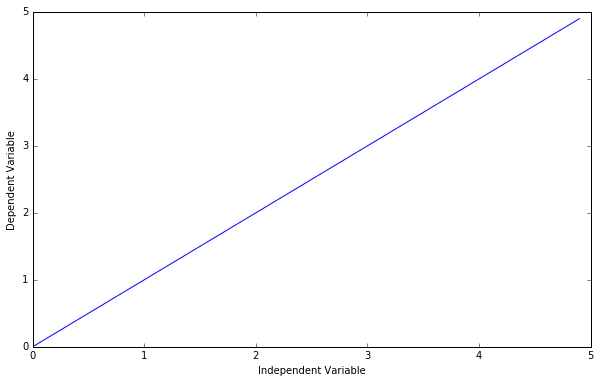

In [23]:
# DEFINE A CURVE

X = np.arange(0.0, 5.0, 0.1)
print X

a = 1
b = 0

Y = a*X + b

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

[(0.99524415, 5.0054579720985286), (0.097650111, 2.2132519414914094), (0.10353051, 2.3345347208645193), (0.035645172, 2.0703295401432413), (0.97840637, 5.0542829888795922)]

0 [2.3905897, 2.8971174]
5 [2.4323282, 2.2747121]
10 [2.6240215, 2.1822309]
15 [2.7561026, 2.1183076]
20 [2.8471642, 2.0742366]
25 [2.9099452, 2.0438526]
30 [2.953229, 2.0229046]
35 [2.9830701, 2.0084624]
40 [3.0036435, 1.9985055]
45 [3.017828, 1.9916407]
50 [3.027607, 1.986908]
55 [3.0343487, 1.9836451]
60 [3.0389972, 1.9813954]
65 [3.0422018, 1.9798445]
70 [3.0444112, 1.9787753]
75 [3.0459344, 1.9780378]
80 [3.0469847, 1.9775296]
85 [3.0477087, 1.9771792]
90 [3.048208, 1.9769377]
95 [3.048552, 1.976771]


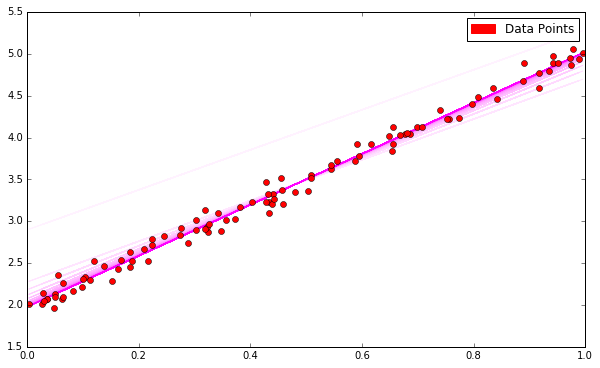

Final Parameters:

(a, b) = (3.048552, 1.976771)


In [38]:
# SIMPLE LINEAR REGRESSION ON RANDOMLY GENERATED DATA

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data) # true

print zip(x_data, y_data)[0:5]; print

a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = tf.add(tf.mul(a, x_data), b) # prediction

loss = tf.reduce_mean(tf.square(y - y_data)) # squared distance

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print step, evals
        train_data.append(evals)
        
converter = plt.colors
cr, cg, cb = (1.,1.,1.)
for f in train_data:
    cb += 1. / len(train_data)
    cg -= 1. / len(train_data)
    if cb > 1.: cb = 1.
    if cg < 0.: cg = 0.
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
plt.plot(x_data, y_data, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

print "Final Parameters:\n"
print "(a, b) = (%f, %f)" % (a,b) 

### B. LOGISTIC REGRESSION

$$\hat{Y} = \sigma(Y) = \frac{\texttt{exp}(Y)}{1 + \texttt{exp}(Y)},\quad\text{where }Y = WX + b$$

step 0, training accuracy 0.353535, cost 34.9926, change in cost 34.9926
step 10, training accuracy 0.585859, cost 30.1727, change in cost 4.81994
step 20, training accuracy 0.646465, cost 28.2092, change in cost 1.96347
step 30, training accuracy 0.646465, cost 26.5583, change in cost 1.65088
step 40, training accuracy 0.646465, cost 25.1892, change in cost 1.36913
step 50, training accuracy 0.646465, cost 24.059, change in cost 1.13023
step 60, training accuracy 0.646465, cost 23.1236, change in cost 0.935404
step 70, training accuracy 0.646465, cost 22.3441, change in cost 0.779413
step 80, training accuracy 0.646465, cost 21.6889, change in cost 0.655268
step 90, training accuracy 0.646465, cost 21.1325, change in cost 0.55637
step 100, training accuracy 0.656566, cost 20.6553, change in cost 0.477179
step 110, training accuracy 0.666667, cost 20.242, change in cost 0.413307
step 120, training accuracy 0.666667, cost 19.8807, change in cost 0.361368
step 130, training accuracy 0.66

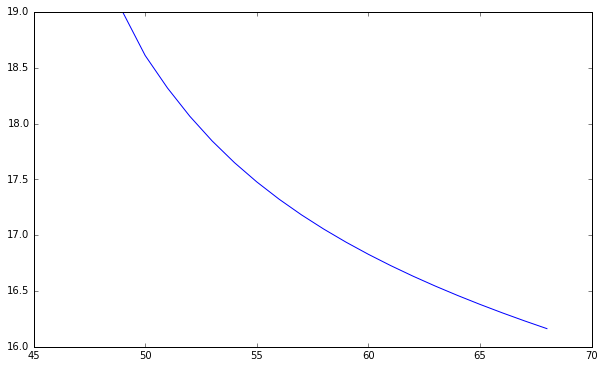

Final Parameters:

Weights

[[ 0.24568598  0.02229524 -0.66542554]
 [ 0.8083452  -0.52181709 -0.73372811]
 [-1.28733969  0.261296    1.07617068]
 [-0.57695746 -0.22872616  0.83339828]]

Bias

[[ 0.14990135  0.09902944 -0.35678092]]


In [62]:
# LOAD DATA

iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values # convert categorical variable into dummy/indicator variables.
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=.33, random_state=42)
numFeatures = trainX.shape[1] # 4 for iris.
numLabels = trainY.shape[1] # 3 for iris.

# SETUP GRAPH

X = tf.placeholder(tf.float32, [None, numFeatures]) # n x 4 matrix.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # n x 3 matrix.

# W = tf.Variable(tf.zeros([4,3])) # 4 x 3 matrix.
# b = tf.Variable(tf.zeros([3])) # 1 x 3 matrix.
    # 0 initialization is fine for logistic regression, it doesn't with neural net
    # because of "symmetry problem" where all the weights are the same => all the activation gives same result
    # and the gradient update halts.
    # so it's a good habit to initialize with random values.

weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                       mean=0, stddev=.01, name='weights'))
bias = tf.Variable(tf.random_normal([1, numLabels],
                                        mean=0, stddev=.01, name='bias'))

apply_weights_OP = tf.matmul(X, weights, name='apply_weights')
add_bias_OP = tf.add(apply_weights_OP, bias, name='add_bias')
activation_OP = tf.nn.sigmoid(add_bias_OP, name='activation')

# CONFIG TRAINING

numEpochs = 700
learningRate = tf.train.exponential_decay(learning_rate=.0008, # initial learning rate.
                                           global_step=1, # decay after each step.
                                           decay_steps=trainX.shape[0], # the number of steps.
                                           decay_rate=.95, # decay rate.
                                           staircase=True) # if True, discrete decay intervals.
cost_OP = tf.nn.l2_loss(activation_OP - yGold, name='square_error_cost')
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

# CONFIG SESSION

sess = tf.Session()
init_OP = tf.global_variables_initializer()
sess.run(init_OP)

correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1)) # 1(*) for first argmax.
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, 'float'))

activation_summary_OP = tf.summary.histogram('output', activation_OP)
accuracy_summary_OP = tf.summary.scalar('accuracy', accuracy_OP)
cost_summary_OP = tf.summary.scalar('cost', cost_OP)
weightSummary = tf.summary.histogram('weights', weights.eval(session=sess))
biasSummary = tf.summary.histogram('biases', bias.eval(session=sess))
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])
writer = tf.summary.FileWriter('summary_loss', sess.graph)

# TRAINING

cost = 0; diff = 1; epoch_values = []; accuracy_values = []; cost_values = []
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print "change in cost %g; convergence." % diff
        break
    else:
        step = sess.run(training_OP, feed_dict={X:trainX, yGold:trainY})
        if i % 10 == 0:
            epoch_values.append(i)
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X:trainX, yGold:trainY})
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            diff = abs(newCost - cost)
            cost = newCost
            print "step %d, training accuracy %g, cost %g, change in cost %g" % (i, train_accuracy, newCost, diff)
print "final accuracy on test set: %s" % str(sess.run(accuracy_OP, feed_dict={X:testX, yGold:testY})); print

# PLOT PROGRESS

plt.plot([np.mean(cost_values[i-50:i]) for i in range(1,len(cost_values))])
plt.show()

# SHOW TRAINING OUTCOME

print "Final Parameters:\n"
print "Weights\n"
print sess.run(weights); print
print "Bias\n"
print sess.run(bias)

## III. ACTIVATION

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [85]:
def plot_act(i=1., actfunc=lambda x:x):
    ws = np.arange(-.5,.5,.05)
    bs = np.arange(-.5,.5,.05)
    W, B = np.meshgrid(ws, bs) # see APPENDIX.
    os = np.array([actfunc(tf.constant(w*i+b)).eval(session=sess)
                  for w,b in zip(np.ravel(W),np.ravel(B))]) # np.ravel: flatten.
    Z = os.reshape(W.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, Z, rstride=1, cstride=1)

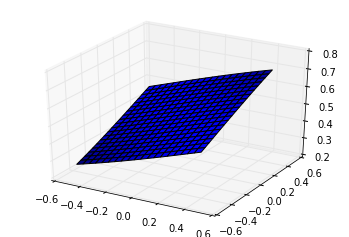

In [86]:
plot_act(1, tf.sigmoid)

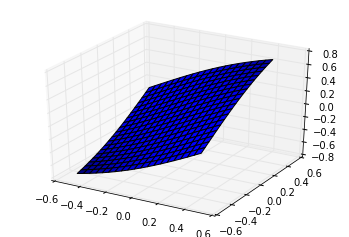

In [88]:
plot_act(1, tf.tanh)

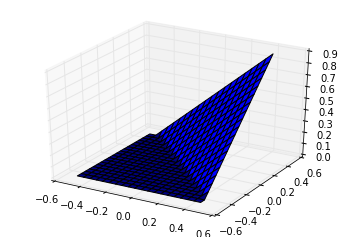

In [89]:
plot_act(1, tf.nn.relu)

In [81]:
# APPENDIX

xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);
[xx,yy] = np.meshgrid(xvalues, yvalues)
print xx; print
print yy

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


## IV. EXTRA

### A. FIB

In [103]:
def fib(n):
    val = tf.Variable([[1,1]])
    x = tf.placeholder(tf.int32, [None, 2])
    y = tf.placeholder(tf.int32, [2, 2])
    z = tf.matmul(x, y)
    update = tf.assign(val, z)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for _ in range(n-2):
            sess.run(update, feed_dict={x:sess.run(val),y:[[1,1],[1,0]]})
        return sess.run(val)[0][0]
    
print [fib(i) for i in range(1,11)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


### B. LINEAR REGRESSION: TEMPERATURE ~ CHIRPS

In [104]:
df = pd.read_csv("http://vip.cs.utsa.edu/classes/cs1173/cs1173s2011/data/PierceCricketData.csv", names=['Chirps','Temp'])
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


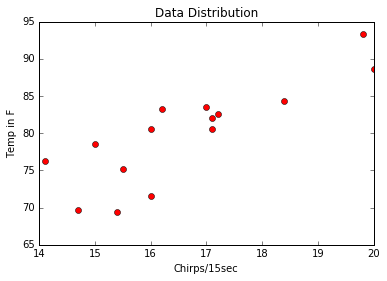

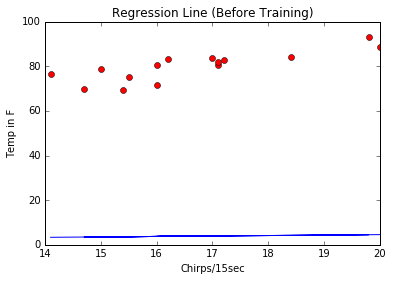


... iteration 0: loss = 5829.828125, change = 0.000000
... iteration 1: loss = 1139.325073, change = 0.000000
... iteration 2: loss = 235.015305, change = 0.000000
... iteration 3: loss = 60.667870, change = 0.000000
... iteration 4: loss = 27.054260, change = 0.000000
... iteration 5: loss = 20.573488, change = 0.000000
... iteration 6: loss = 19.323811, change = 0.000000
... iteration 7: loss = 19.082680, change = 0.000000
... iteration 8: loss = 19.035978, change = 0.000000
... iteration 9: loss = 19.026766, change = 0.000000
... iteration 10: loss = 19.024788, change = 0.000000
... iteration 11: loss = 19.024191, change = 0.000000
... iteration 12: loss = 19.023882, change = 0.000000
Converged at 13 iteration, with loss 19.023621



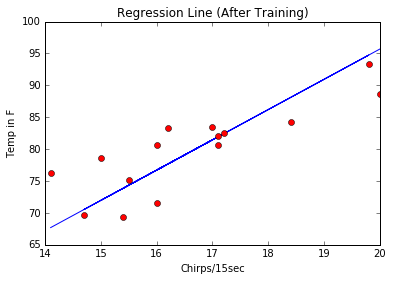

In [123]:
# LOAD DATA

x_data, y_data = (df['Chirps'].values, df['Temp'].values)

plt.plot(x_data, y_data, 'ro')
plt.title('Data Distribution')
plt.xlabel('Chirps/15sec')
plt.ylabel('Temp in F')
plt.show()
print

# BUILD GRAPH

x = tf.placeholder(tf.float32, shape=(x_data.shape))
y = tf.placeholder(tf.float32, shape=(y_data.shape))
a, b = tf.Variable(np.random.rand()), tf.Variable(np.random.rand())
y_pred = tf.add(tf.mul(a, x), b)

# CONFIG MODEL

loss = tf.reduce_mean(tf.squared_difference(y_pred, y_data))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001) 
    # alternative: optimizer = tf.train.AdagradOptimizer(learning_rate=1)
    # ~17.30 loss.
train = optimizer.minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# BEFORE TRAINING

pred = sess.run(y_pred, feed_dict={x:x_data})
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
plt.title('Regression Line (Before Training)')
plt.xlabel('Chirps/15sec')
plt.ylabel('Temp in F')
plt.show()
print

# TRAINING

tol = .0001
prev_a, prev_b = np.inf, np.inf
a_list, b_list = [], []
losses = []

for i in range(1000):
    _, cur_a, cur_b, cur_loss = sess.run([train, a, b, loss], feed_dict={x:x_data, y:y_data})
    a_list.append(cur_a); b_list.append(cur_b); losses.append(cur_loss)
    if (np.abs(prev_a-cur_a) or np.abs(prev_b-cur_b)) <= tol:
        print 'Converged at %d iteration, with loss %f' % (i, cur_loss)
        break
    print '... iteration %d: loss = %f, change = %f' % (i, cur_loss, np.abs(losses[-1]-cur_loss))
    prev_a = cur_a; prev_b = cur_b

print

# AFTER TRAINING

pred = sess.run(y_pred, feed_dict={x:x_data})
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
plt.title('Regression Line (After Training)')
plt.xlabel('Chirps/15sec')
plt.ylabel('Temp in F')
plt.show()